In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loans = pd.read_csv('kiva_loans.csv')
theme_ids = pd.read_csv('loan_theme_ids.csv')
theme_reg = pd.read_csv('loan_themes_by_region.csv')
mpi_national  = pd.read_csv('MPI_national.csv')
mpi_subnational = pd.read_csv('MPI_national.csv')
k_mpi_reg_loc  = pd.read_csv('kiva_mpi_region_locations.csv')
Loans = pd.read_csv('loans.csv')
lenders = pd.read_csv('lenders.csv')
loans_lenders = pd.read_csv('loans_lenders.csv')

In [3]:
loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


In [4]:
theme_ids.head(2)

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0


In [142]:
k_mpi_reg_loc.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


In [6]:
k_mpi_reg_loc.isnull().sum()

LocationName    1788
ISO             1764
country         1764
region          1788
world_region    1764
MPI             1788
geo                0
lat             1880
lon             1880
dtype: int64

In [7]:
k_mpi_reg_loc1 = k_mpi_reg_loc.dropna(thresh=5)

In [8]:
k_mpi_reg_loc1.index = range(0, len(k_mpi_reg_loc1))

In [143]:
k_mpi_reg_loc1.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754


In [10]:
sorted_k_mpi_reg = k_mpi_reg_loc1.sort_values(by = 'MPI', ascending = False)

In [11]:
sorted_k_mpi_reg.index = range(0, len(sorted_k_mpi_reg))

In [144]:
sorted_k_mpi_reg.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Lac, Chad",TCD,Chad,Lac,Sub-Saharan Africa,0.744,"(18.3281428, -77.2405153)",18.328143,-77.240515
1,"Wadi Fira, Chad",TCD,Chad,Wadi Fira,Sub-Saharan Africa,0.709,"(15.0892416, 21.4752851)",15.089242,21.475285
2,"Est, Burkina Faso",BFA,Burkina Faso,Est,Sub-Saharan Africa,0.698,"(12.4365526, 0.9056623)",12.436553,0.905662


In [17]:
theme_reg.head(2)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0


In [18]:
theme_reg.columns

Index(['Partner ID', 'Field Partner Name', 'sector', 'Loan Theme ID',
       'Loan Theme Type', 'country', 'forkiva', 'region', 'geocode_old', 'ISO',
       'number', 'amount', 'LocationName', 'geocode', 'names', 'geo', 'lat',
       'lon', 'mpi_region', 'mpi_geo', 'rural_pct'],
      dtype='object')

In [145]:
Loans.head(3)

,loan_id,loan_name,original_language,description,description_translated,funded_amount,loan_amount,status,activity_name,sector_name,...,raised_time,lender_term,num_lenders_total,num_journal_entries,num_bulk_entries,tags,borrower_genders,borrower_pictured,repayment_interval,distribution_model
0,657307,Aivy,English,"Aivy, 21 years of age, is single and lives in ...",NaN,125.0,125.0,funded,General Store,Retail,...,2014-01-15 04:48:22.000 +0000,7.0,3,2,1,NaN,female,true,irregular,field_partner
1,657259,Idalia Marizza,Spanish,"Doña Idalia, esta casada, tiene 57 años de eda...","Idalia, 57, is married and lives with her husb...",400.0,400.0,funded,Used Clothing,Clothing,...,2014-02-25 06:42:06.000 +0000,8.0,11,2,1,NaN,female,true,monthly,field_partner
2,658010,Aasia,English,Aasia is a 45-year-old married lady and she ha...,NaN,400.0,400.0,funded,General Store,Retail,...,2014-01-24 23:06:18.000 +0000,14.0,16,2,1,"#Woman Owned Biz, #Supporting Family, user_fav...",female,true,monthly,field_partner


In [24]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 20 columns):
id                    671205 non-null int64
funded_amount         671205 non-null float64
loan_amount           671205 non-null float64
activity              671205 non-null object
sector                671205 non-null object
use                   666973 non-null object
country_code          671197 non-null object
country               671205 non-null object
region                614405 non-null object
currency              671205 non-null object
partner_id            657698 non-null float64
posted_time           671205 non-null object
disbursed_time        668809 non-null object
funded_time           622874 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
tags                  499789 non-null object
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
date                  671205 non

In [25]:
loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [26]:
loans.describe(include = 'all')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
count,6.712050e+05,671205.000000,671205.000000,671205,671205,666973,671197,671205,614405,671205,657698.000000,671205,668809,622874,671205.000000,671205.000000,499789,666984,671205,671205
unique,NaN,NaN,NaN,163,15,424912,86,87,12695,67,NaN,667399,5719,498007,NaN,NaN,86719,11298,4,1298
top,NaN,NaN,NaN,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,NaN,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,NaN,NaN,user_favorite,female,monthly,2017-03-20
freq,NaN,NaN,NaN,72955,180302,5217,160441,160441,10000,160440,NaN,25,2800,33,NaN,NaN,27088,426502,342717,1308
mean,9.932486e+05,785.995061,842.397107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.199616,NaN,NaN,NaN,13.739022,20.590922,NaN,NaN,NaN,NaN
std,1.966113e+05,1130.398941,1198.660073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.247581,NaN,NaN,NaN,8.598919,28.459551,NaN,NaN,NaN,NaN
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,8.230720e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN
50%,9.927800e+05,450.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,NaN,NaN,13.000000,13.000000,NaN,NaN,NaN,NaN
75%,1.163653e+06,900.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,NaN,NaN,14.000000,24.000000,NaN,NaN,NaN,NaN


In [27]:
loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

# Functions

In [28]:
def loan_percent():
    c = loans['country'].value_counts().index
    ctry_l_percent = {}
    for con in c:
        calc = loans[loans['country'] == con]['loan_amount'].sum()/loans['loan_amount'].sum()
        ctry_l_percent[con] = round(calc*100,2)
    return ctry_l_percent

In [29]:
lp = loan_percent()

In [31]:
def countries_fund():
    c = loans['country'].value_counts().index
    ctry_fund = {}
    for ctry in c:
        cal = loans[loans['country'] == ctry]['funded_amount'].mean()
        ctry_fund[ctry] = cal
    return ctry_fund

In [32]:
def region_fund():
    re = loans['region'].value_counts().index
    reg1_fund = {}
    for regg in re:
        cal6 = loans[loans['region'] == regg]['funded_amount'].mean()
        reg1_fund[regg] = cal6
    return reg1_fund

In [33]:
def activities_fund():
    a = loans['activity'].value_counts().index
    act_fund = {}
    for act in a:
        cal1 = loans[loans['activity'] == act]['funded_amount'].mean()
        act_fund[act] = cal1
    return act_fund

In [34]:
def sectors_fund():
    s = loans['sector'].value_counts().index
    sec_fund = {}
    for sec in s:
        cal2 = loans[loans['sector'] == sec]['funded_amount'].mean()
        sec_fund[sec] = cal2
    return sec_fund

In [35]:
def poor_find():
    p = k_mpi_reg_loc['region'].value_counts().index
    poor = {}
    for ct in p:
        cal5 = k_mpi_reg_loc['MPI']
        poor[ct] = cal5
    return poor

In [36]:
poor_reg = poor_find()

In [38]:
cf = countries_fund()
af = activities_fund()
sf = sectors_fund()
rf1 = region_fund()

In [39]:
items1 = [(v,k) for k, v in cf.items()]
items1.sort()
items2 = [(v,k) for k, v in af.items()]
items2.sort()
items3 = [(v,k) for k, v in sf.items()]
items3.sort()
items4 = [(v,k) for k, v in rf1.items()]
items4.sort()

# TOP 10

In [40]:
#top 10 countries on funded amount(mean)
items1[::-1][:10]

[(50000.0, "Cote D'Ivoire"),
 (15000.0, 'Mauritania'),
 (7812.5, 'Bhutan'),
 (7625.0, 'Chile'),
 (7000.0, 'Afghanistan'),
 (6142.578125, 'Congo'),
 (4409.191176470588, 'Puerto Rico'),
 (4200.604838709677, 'Dominican Republic'),
 (4046.875, 'Namibia'),
 (3800.8435910060725, 'United States')]

In [41]:
#top 10 region on funded amount(mean)
items4[::-1][:10]

[(50000.0, 'Tsihombe'),
 (50000.0, 'Simeulue'),
 (50000.0, 'Parakou'),
 (50000.0, 'MUSOMA'),
 (50000.0, 'Kolia'),
 (50000.0, 'Juba'),
 (50000.0, 'Cerrik'),
 (45850.0, 'Cherán'),
 (35000.0, 'Vicuna'),
 (33583.333333333336, 'Les Cayes')]

In [42]:
#Top 10 activities on funded amount(mean)
items2[::-1][:10]

[(3640.1470588235293, 'Landscaping / Gardening'),
 (3074.6581196581196, 'Renewable Energy Products'),
 (2405.870786516854, 'Technology'),
 (2325.8854166666665, 'Communications'),
 (2280.3278688524592, 'Child Care'),
 (2228.1724137931033, 'Cleaning Services'),
 (2092.3076923076924, 'Film'),
 (1851.595744680851, 'Used Shoes'),
 (1829.6153846153845, 'Florist'),
 (1700.3810975609756, 'Perfumes')]

In [43]:
#Top 10 Funded sectors
items3[::-1][:10]

[(1449.3690851735016, 'Wholesale'),
 (1232.644578313253, 'Entertainment'),
 (1063.0160039093519, 'Clothing'),
 (1008.5378111040204, 'Construction'),
 (994.4974520221186, 'Health'),
 (980.1869817578773, 'Arts'),
 (968.7847031889853, 'Education'),
 (951.840607000443, 'Services'),
 (862.8624355670103, 'Manufacturing'),
 (842.1757392596062, 'Food')]

In [147]:
sorted_k_mpi_reg.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Lac, Chad",TCD,Chad,Lac,Sub-Saharan Africa,0.744,"(18.3281428, -77.2405153)",18.328143,-77.240515
1,"Wadi Fira, Chad",TCD,Chad,Wadi Fira,Sub-Saharan Africa,0.709,"(15.0892416, 21.4752851)",15.089242,21.475285
2,"Est, Burkina Faso",BFA,Burkina Faso,Est,Sub-Saharan Africa,0.698,"(12.4365526, 0.9056623)",12.436553,0.905662


In [45]:
Top_10_poor_countries = sorted_k_mpi_reg[['LocationName','country','region','world_region','MPI']]

In [46]:
#Top 10 poor countries and their region based on the MPI(Multidimensional poverty index)
Top_10_poor_countries[:100]

,LocationName,country,region,world_region,MPI
0,"Lac, Chad",Chad,Lac,Sub-Saharan Africa,0.744
1,"Wadi Fira, Chad",Chad,Wadi Fira,Sub-Saharan Africa,0.709
2,"Est, Burkina Faso",Burkina Faso,Est,Sub-Saharan Africa,0.698
3,"Sila, Chad",Chad,Sila,Sub-Saharan Africa,0.697
4,"Kanem, Chad",Chad,Kanem,Sub-Saharan Africa,0.696
5,"Sahel, Burkina Faso",Burkina Faso,Sahel,Sub-Saharan Africa,0.690
6,"Ouaddað, Chad",Chad,Ouaddað,Sub-Saharan Africa,0.683
7,"Salamat, Chad",Chad,Salamat,Sub-Saharan Africa,0.678
8,"Maradi, Niger",Niger,Maradi,Sub-Saharan Africa,0.664
9,"Affar, Ethiopia",Ethiopia,Affar,Sub-Saharan Africa,0.663


In [47]:
def find():
    fd = Top_10_poor_countries['region']
    find = []
    for rn in fd:
        find.append(rn)
    return find

In [48]:
fi = find()

In [52]:
Top_reg =loans['region'].value_counts()

In [53]:
Top_reg[:10]

Kaduna             10000
Lahore              7178
Rawalpindi          4496
Cusco               3841
Dar es Salaam       3719
Kisii               3546
Palo, Leyte         3320
Narra, Palawan      3197
Quezon, Palawan     3120
Kitale              3104
Name: region, dtype: int64

# Exploratory Data Analysis

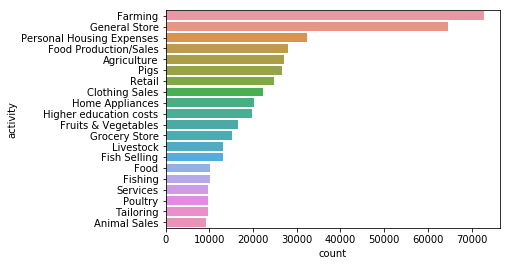

In [54]:
sns.countplot(y = 'activity', order = loans['activity'].value_counts().iloc[:20].index, data = loans)

__Farming__ is the most Frequent activity for which the people had got loans for followed by __General store__

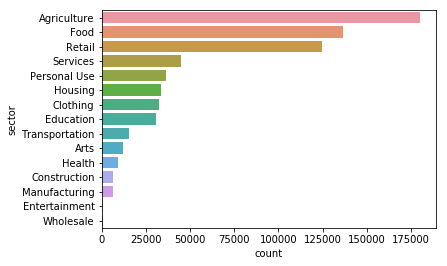

In [55]:
sns.countplot(y = 'sector', order = loans['sector'].value_counts().iloc[:20].index, data = loans)

Top 3 most Frequent __sectors__:
    1. Agriculture
    2. Food
    3. Retail

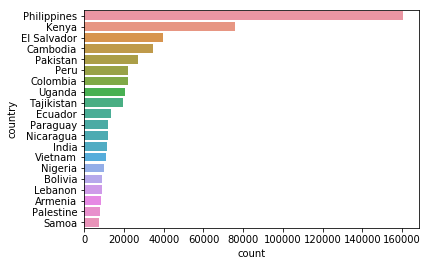

In [56]:
sns.countplot(y = 'country', order = loans['country'].value_counts().iloc[:20].index, data = loans)

Top 3 __Countries__ which got more loans:
    1. Philippines
    2. kenya
    3. El Salvador

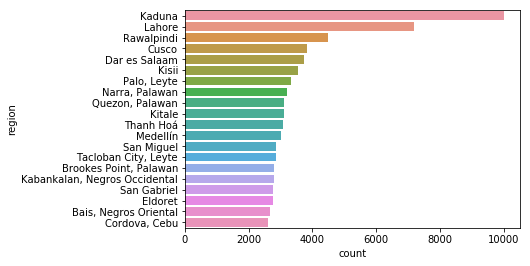

In [57]:
sns.countplot(y = 'region', order = loans['region'].value_counts().iloc[:20].index, data = loans)

Top 3 __Regions__ which got more loans:

1. Kaduna(Nigeria)
2. Lahore(pakistan)
3. Rawalpindi(pakistan)

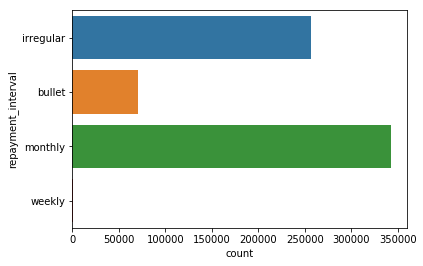

In [58]:
sns.countplot(y = 'repayment_interval', data = loans)

In the repayment Interval section __monthly__ payment is most frequent followed by __irregular__

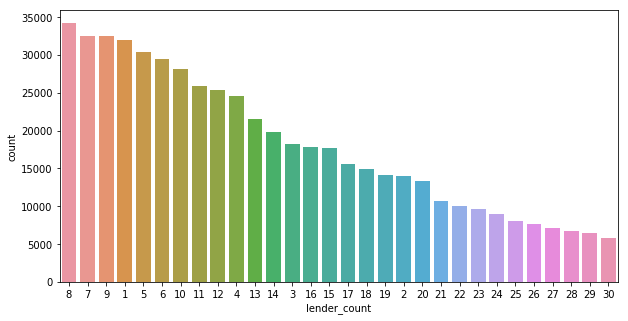

In [59]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'lender_count',order = loans['lender_count'].value_counts().iloc[:30].index, data = loans)

Most number of people who lends is __Eight__ followed by __Seven__ and __Nine__

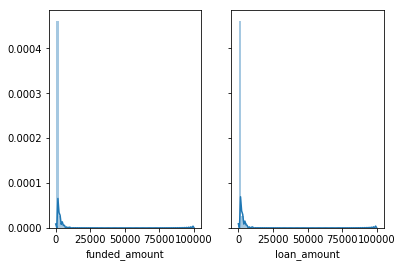

In [131]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True)

sns.distplot(loans['funded_amount'],ax = axis1)
sns.distplot(loans['loan_amount'],ax = axis2)

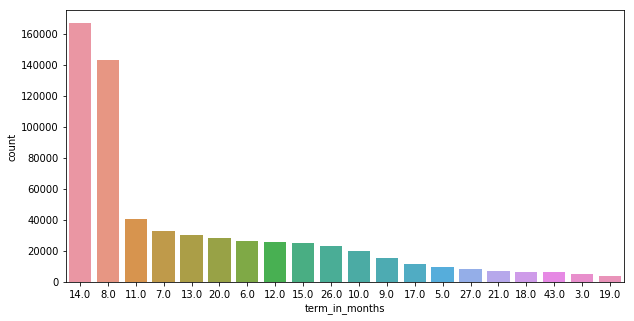

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'term_in_months',order = loans['term_in_months'].value_counts().iloc[:20].index, data = loans)

The highest Duration for which the loan was disbursed in months is __14__ followed by __8__

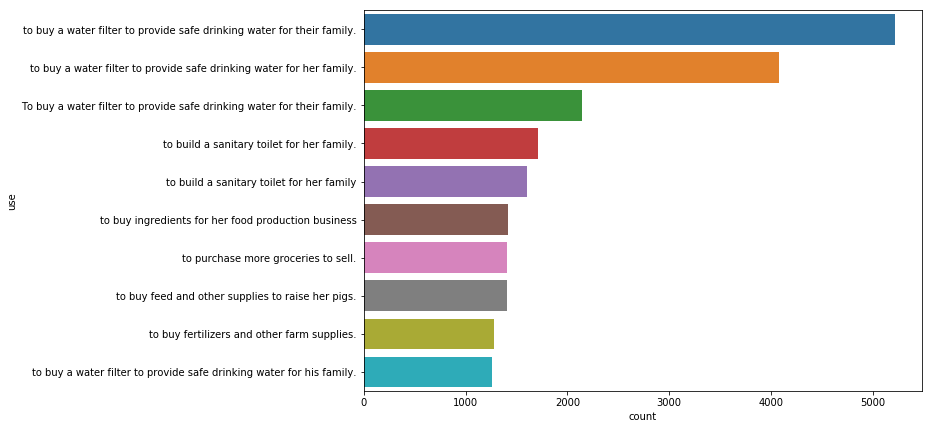

In [63]:
plt.figure(figsize=(10,7))
sns.countplot(y = 'use',order = loans['use'].value_counts().iloc[:10].index, data = loans)

The most popular use of loans is __to buy a water filter to provide safe drinking water for their family__

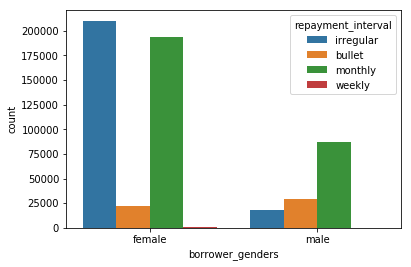

In [64]:
#Distribution of individual male and female borrowers
#Sex borrowers vs repayment interval
sns.countplot(x = 'borrower_genders',order = loans['borrower_genders'].value_counts().iloc[:2].index,hue = 'repayment_interval', data = loans)

__Borrower Genders__ vs __Repayment Interval__:
    1. Female(irregular > monthly)
    2. Male(monthly > bullet)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

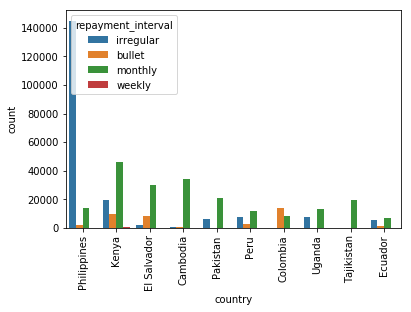

In [65]:
#country vs repayment interval
sns.countplot(x = 'country',order = loans['country'].value_counts().iloc[:10].index,hue = 'repayment_interval', data = loans)
plt.xticks(rotation = 90)

__Country__ vs __Repayment Interval__:
    
    1.Philippines(mostly irregular)
    2.kenya(mostly monthly)


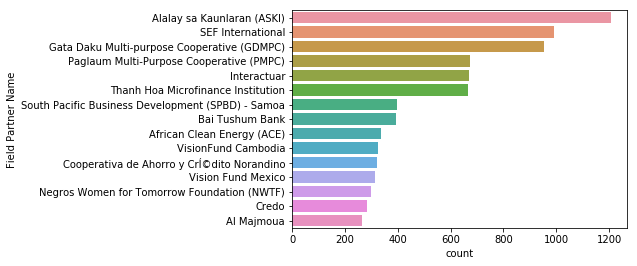

In [66]:
# Funding partners
sns.countplot(y = 'Field Partner Name', order = theme_reg['Field Partner Name'].value_counts().iloc[:15].index, data = theme_reg)

Most dominant field partner around the word is __Alalay sa Kaunlaran (ASKI)__ followed by __SEF International.__

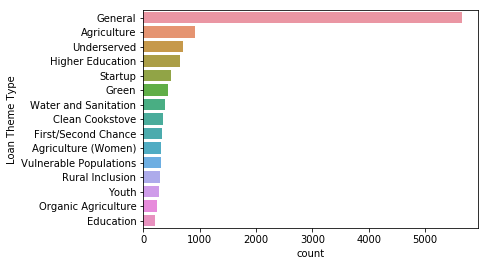

In [67]:
#Loan theme type
sns.countplot(y = 'Loan Theme Type', order = theme_reg['Loan Theme Type'].value_counts().iloc[:15].index, data = theme_reg)

__Popular Loan Theme type__:
    
    1. General
    2. Agriculture
    3. Underserved

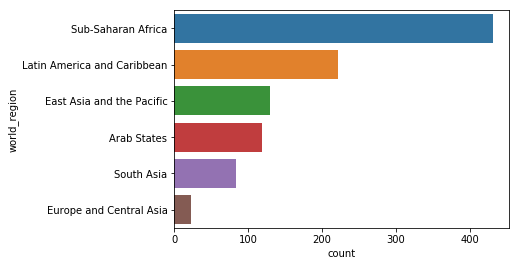

In [68]:
#world region
# sub-saharan africa top the list followed by the latin america and carribbean
sns.countplot(y = 'world_region', order = k_mpi_reg_loc['world_region'].value_counts().index, data = k_mpi_reg_loc)

__Top World Regions:__
    
    1. Sub-Saharan africa
    2. Latin american and caribbean
    3. East asia and the pacific
    

In [69]:
#wn = loans['country'] == 'India' & loans['repayment_interval'] == 'monthly'
#one = loans['country'] == 'India'# and 
#two = loans['repayment_interval'] == 'monthly'
#three = one & two

In [148]:
sorted_k_mpi_reg.head(3)

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Lac, Chad",TCD,Chad,Lac,Sub-Saharan Africa,0.744,"(18.3281428, -77.2405153)",18.328143,-77.240515
1,"Wadi Fira, Chad",TCD,Chad,Wadi Fira,Sub-Saharan Africa,0.709,"(15.0892416, 21.4752851)",15.089242,21.475285
2,"Est, Burkina Faso",BFA,Burkina Faso,Est,Sub-Saharan Africa,0.698,"(12.4365526, 0.9056623)",12.436553,0.905662


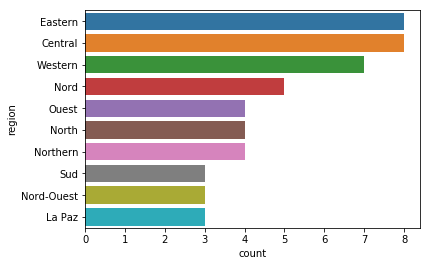

In [71]:
sns.countplot(y = 'region', order = sorted_k_mpi_reg['region'].value_counts().iloc[:10].index, data = sorted_k_mpi_reg)

In [149]:
contry_rp_count = pd.crosstab(loans[0:10001].country, loans[:10001].repayment_interval, margins = True, margins_name = "Aggregate")

In [152]:
contry_rp_count.head(3)

repayment_interval,bullet,irregular,monthly,weekly,Aggregate
country,,,,,
Albania,1,0,46,0,47
Armenia,0,0,109,0,109
Azerbaijan,0,0,45,0,45


In [150]:
region_rp_count = pd.crosstab(loans.region, loans.repayment_interval, margins = True, margins_name = "Aggregate")

In [154]:
region_rp_count.head(3)

repayment_interval,bullet,irregular,monthly,Aggregate
region,,,,
"""The first May"" village",0,0,12,12
01 Công Chính,0,0,17,17
01 Công Liêm,0,0,31,31


# Philippines

In [74]:
phil = loans[loans['country'] == 'Philippines']
phil.index = range(0, len(phil))

In [155]:
phil.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653092,175.0,175.0,Pigs,Agriculture,to buy piglets and feed,PH,Philippines,Liloy-Dela Paz,PHP,126.0,2014-01-02 00:25:40+00:00,2013-12-12 08:00:00+00:00,2014-01-02 01:42:51+00:00,8.0,6,NaN,female,irregular,2014-01-02
1,653149,175.0,175.0,Pigs,Agriculture,to purchase feed and vitamins for her pigs,PH,Philippines,"Tanjay, Negros Oriental",PHP,145.0,2014-01-02 04:18:30+00:00,2013-12-06 08:00:00+00:00,2014-01-02 07:47:28+00:00,8.0,7,NaN,female,irregular,2014-01-02
2,653123,700.0,700.0,General Store,Retail,"to buy additional items like eggs, charcoal, r...",PH,Philippines,"Brookes Point, Palawan",PHP,145.0,2014-01-02 02:18:02+00:00,2013-12-10 08:00:00+00:00,2014-01-02 03:26:10+00:00,5.0,2,NaN,female,irregular,2014-01-02


In [76]:
phil['region'].value_counts()

Palo, Leyte                                           3320
Narra, Palawan                                        3197
Quezon, Palawan                                       3120
Tacloban City, Leyte                                  2843
Brookes Point, Palawan                                2793
Kabankalan, Negros Occidental                         2792
Bais, Negros Oriental                                 2665
Cordova, Cebu                                         2617
Roxas City, Capiz                                     2580
Banga, Aklan                                          2526
Dumaguete, Negros Oriental                            2467
Hinigaran, Negros Occidental                          2407
Isabela, Negros Occidental                            2371
Calbayog City, Samar                                  2197
Tanjay, Negros Oriental                               2092
Himamaylan, Negros Occidental                         2052
Calatrava, Negros Occidental                          20

In [159]:
#Amount in PHP

print('Minimum_amt:',phil['loan_amount'].min())
print('Maximum_amt:',phil['loan_amount'].max())
print('Mean_amt:',phil['loan_amount'].mean())
print('standard_dev:',phil['loan_amount'].std())


Minimum_amt: 25.0
Maximum_amt: 25000.0
Mean_amt: 344.93817041778595
standard_dev: 234.91784167592786


In [78]:
def regions_fund():
    r = phil['region'].value_counts().index
    reg_fund = {}
    for reg in r:
        cal4 = phil[phil['region'] == reg]['funded_amount'].sum()
        reg_fund[reg] = cal4
    return reg_fund

In [79]:
regs =regions_fund()

In [80]:
items5 = [(v,k) for k, v in regs.items()]
items5.sort()

In [81]:
#Top 10 regioms in philippines on funded amount(mean)
reg10 = items5[::-1][:10]


In [82]:
reg10

[(1234625.0, 'Narra, Palawan'),
 (1210875.0, 'Quezon, Palawan'),
 (1180100.0, 'Brookes Point, Palawan'),
 (1040700.0, 'Kabankalan, Negros Occidental'),
 (956950.0, 'Hinigaran, Negros Occidental'),
 (902675.0, 'Cordova, Cebu'),
 (886500.0, 'Isabela, Negros Occidental'),
 (829800.0, 'Bais, Negros Oriental'),
 (807850.0, 'Dumaguete, Negros Oriental'),
 (750525.0, 'Roxas City, Capiz')]

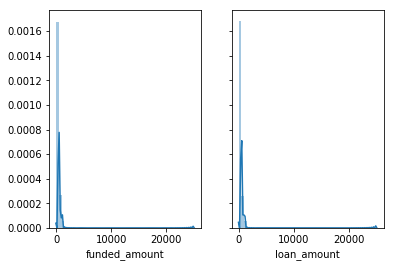

In [130]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True)

sns.distplot(phil['funded_amount'],ax = axis1)
sns.distplot(phil['loan_amount'],ax = axis2)

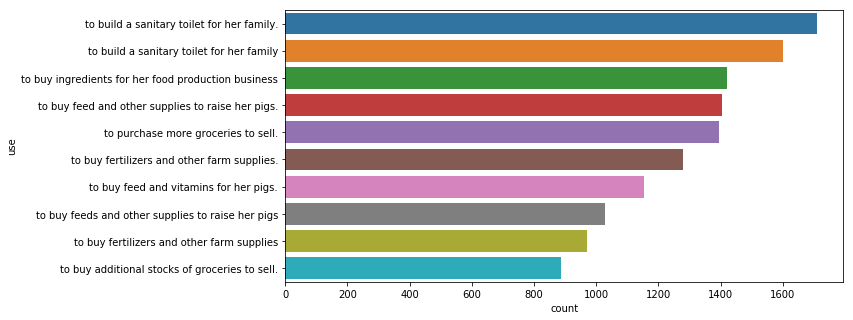

In [85]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'use',order = phil['use'].value_counts().iloc[:10].index, data = phil)

The most popular use of loans is __to buy a sanitary toilet for her family.__

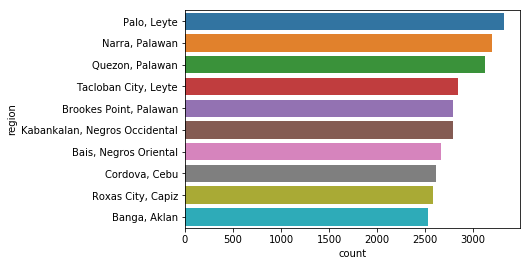

In [86]:
sns.countplot(y = 'region', order = phil['region'].value_counts().iloc[:10].index, data = phil)

Top 3 __Regions__ which got more loans:

1. Palo, Leyte
2. Narra, Palawan
3. Quezo, Palawan

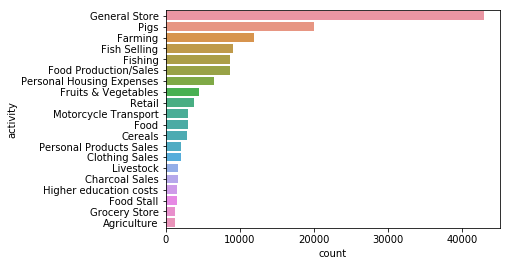

In [87]:
sns.countplot(y = 'activity', order = phil['activity'].value_counts().iloc[:20].index, data = phil)

__General store__ is the most Frequent activity for which the people had got loans for followed by __pigs__

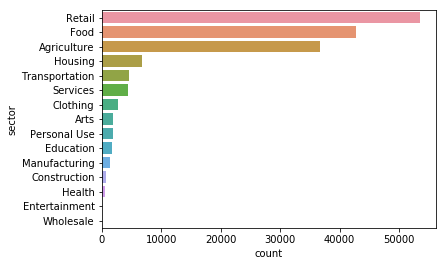

In [88]:
sns.countplot(y = 'sector', order = phil['sector'].value_counts().index, data = phil)

Top 3 most Frequent __sectors__:
    1. Retail
    2. Food
    3. Agriculture

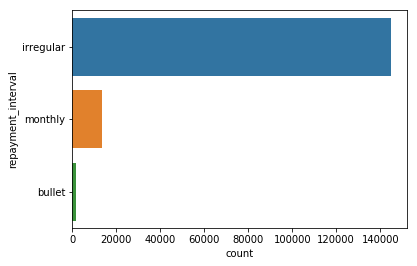

In [89]:
sns.countplot(y = 'repayment_interval', data = phil)

In the repayment Interval section __irregular__ payment is most frequent followed by __monthly__

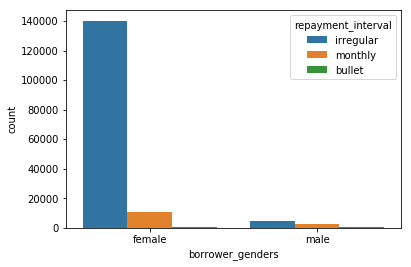

In [90]:
#Sex borrowers vs repayment interval
sns.countplot(x = 'borrower_genders',order = phil['borrower_genders'].value_counts().index,hue = 'repayment_interval', data = phil)

__Borrower Genders__ vs __Repayment Interval__:
    1. Female(irregular > monthly)
    2. Male(irregular > monthly)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text xticklabel objects>)

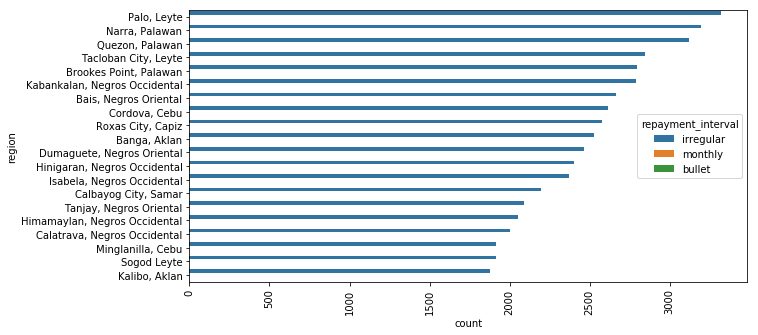

In [139]:
#Region vs repayment interval

plt.figure(figsize=(10,5))
sns.countplot(y = 'region',order = phil['region'].value_counts().iloc[:20].index,hue = 'repayment_interval', data = phil)
plt.xticks(rotation = 90)

__Most of the regions in philippines are irregular in repayment__

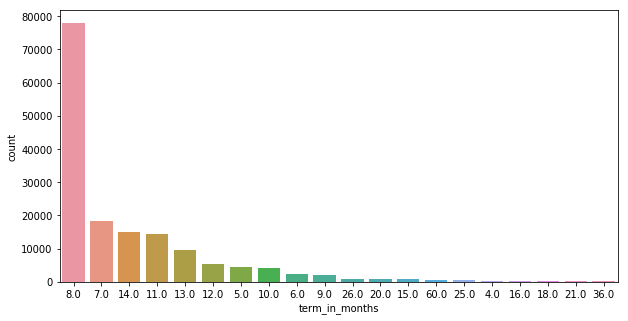

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'term_in_months',order = phil['term_in_months'].value_counts().iloc[:20].index, data = phil)

The highest Duration for which the loan was disbursed in months is __8__ followed by __7__

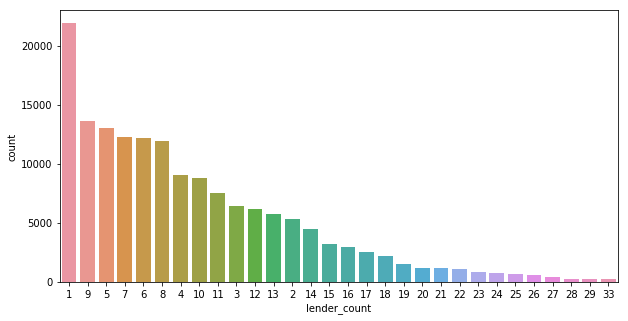

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'lender_count',order = phil['lender_count'].value_counts().iloc[:30].index, data = phil)

Most number of people who lends is __Eight__ followed by __One__ and __Nine__

In [94]:
theme_reg_phil = theme_reg[theme_reg['country'] == 'Philippines']
theme_reg_phil.index = range(0, len(theme_reg_phil))

In [160]:
theme_reg_phil.head(3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"#2 Bayabas St. San Gabriel Tuguegarao City,Cag...",NaN,PHL,...,500,"#2 Bayabas St. San Gabriel Tuguegarao City,Cag...",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PHL,NaN,84.0
1,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"#52C Pagaliluan St. Gosi Sur, Tuguegarao",NaN,PHL,...,1000,"#52C Pagaliluan St. Gosi Sur, Tuguegarao, Phil...",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PHL,NaN,84.0
2,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,a1050000000wf0V,General,Philippines,No,"214 Bonifacio St. Calaocan, Alicia, Isabela",NaN,PHL,...,1075,"214 Bonifacio St. Calaocan, Alicia, Isabela, P...",NaN,NaN,"(1000.0, 1000.0)",NaN,NaN,PHL,NaN,84.0


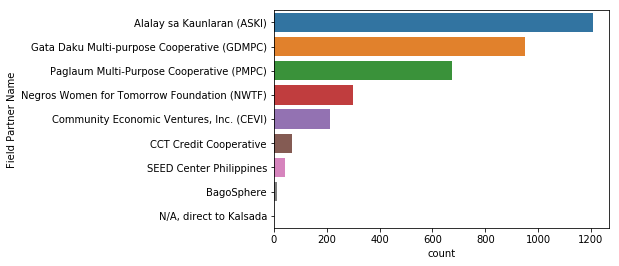

In [96]:
# Funding partners
sns.countplot(y = 'Field Partner Name', order = theme_reg_phil['Field Partner Name'].value_counts().iloc[:10].index, data = theme_reg_phil)

Most dominant field partner in philippines is __Alalay sa Kaunlaran (ASKI)__ followed by __Gata Daku Multi-purpose Cooperative(GDMPC).__

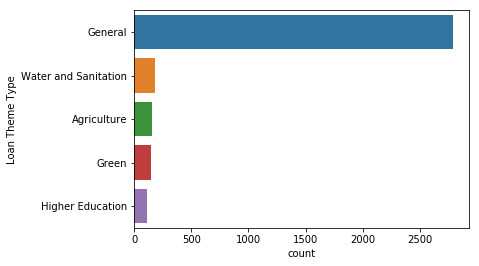

In [140]:
#Loan theme type
sns.countplot(y = 'Loan Theme Type', order = theme_reg_phil['Loan Theme Type'].value_counts().iloc[:5].index, data = theme_reg_phil)

__Popular Loan Theme type__:
    
    1. General
    2. Water and Sanitation
    3. Agriculture

# India

In [98]:
Ind = loans[loans['country'] == 'India']
Ind.index = range(0, len(Ind))

In [161]:
Ind.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
1,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
2,653075,225.0,225.0,Poultry,Agriculture,to expand her existing poultry farm business.,IN,India,Dhupguri,INR,334.0,2014-01-01 11:24:40+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:58:18+00:00,43.0,7,user_favorite,female,bullet,2014-01-01


In [162]:
#Amount in PHP

print('Minimum_amt:',Ind['loan_amount'].min())
print('Maximum_amt:',Ind['loan_amount'].max())
print('Mean_amt:',Ind['loan_amount'].mean())
print('standard_dev:',Ind['loan_amount'].std())


Minimum_amt: 25.0
Maximum_amt: 12925.0
Mean_amt: 598.6673489365489
standard_dev: 741.6568650874624


In [101]:
def I_regions_fund():
    i = Ind['region'].value_counts().index
    I_reg_fund = {}
    for Ireg in i:
        cal8 = Ind[Ind['region'] == Ireg]['funded_amount'].sum()
        I_reg_fund[Ireg] = cal8
    return I_reg_fund

In [102]:
reg_ind = I_regions_fund()

In [103]:
items8 = [(v,k) for k, v in reg_ind.items()]
items8.sort()

In [104]:
reg_ind10 = items8[::-1][:10]

In [105]:
reg_ind10

[(352150.0, 'Jeypore, Odisha'),
 (228825.0, 'Falakata'),
 (225075.0, 'Dhupguri'),
 (165075.0, 'Odagaon, Odisha'),
 (164825.0, 'Sonepur, Odisha'),
 (160800.0, 'Semliguda, Odisha'),
 (136750.0, 'Surendranagar'),
 (134775.0, 'Khurda'),
 (124350.0, 'Churachandpur'),
 (122700.0, 'Titilagarh,Bolangir,Odisha')]

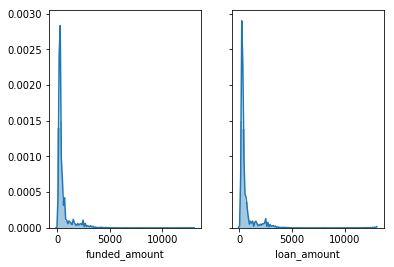

In [106]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey = True)

sns.distplot(Ind['funded_amount'],ax = axis1)
sns.distplot(Ind['loan_amount'],ax = axis2)

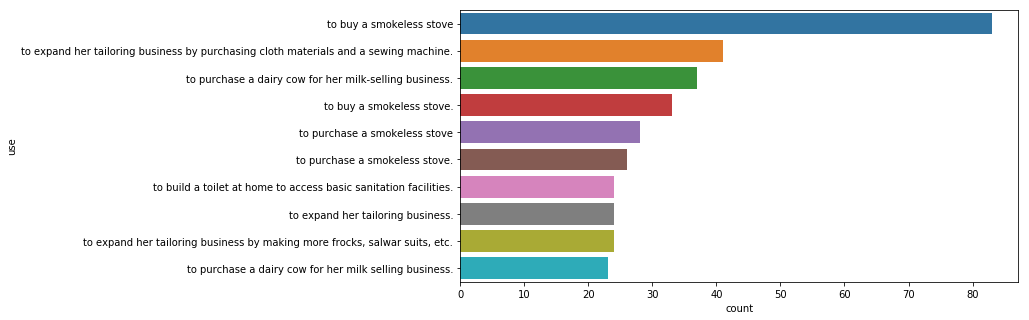

In [107]:
plt.figure(figsize=(10,5))
sns.countplot(y = 'use',order = Ind['use'].value_counts().iloc[:10].index, data = Ind)

The most popular use of loans is __to buy a smokeless stove.__

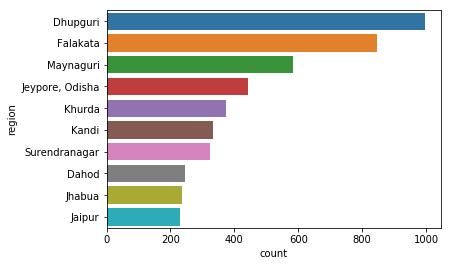

In [108]:
sns.countplot(y = 'region', order = Ind['region'].value_counts().iloc[:10].index, data = Ind)

Top 3 __Regions__ which got more loans:

1. Dhupguri
2. Falakata
3. Maynaguri

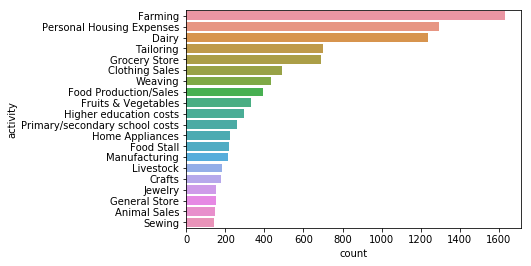

In [109]:
sns.countplot(y = 'activity', order = Ind['activity'].value_counts().iloc[:20].index, data = Ind)

__Farming__ is the most Frequent activity for which the people had got loans for followed by __Personal Housing Expenses__

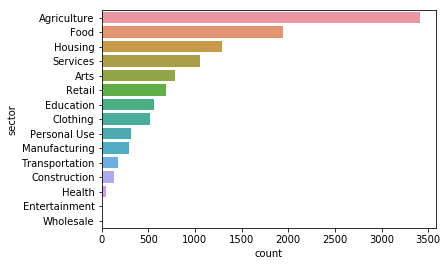

In [110]:
sns.countplot(y = 'sector', order = Ind['sector'].value_counts().index, data = Ind)

Top 3 most Frequent __sectors__:
    1. Agriculture
    2. Food
    3. Housing

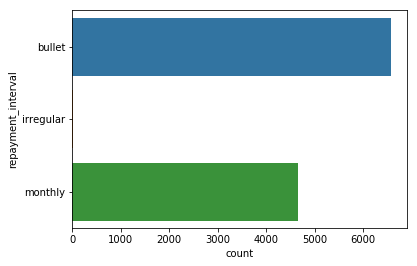

In [111]:
sns.countplot(y = 'repayment_interval', data = Ind)

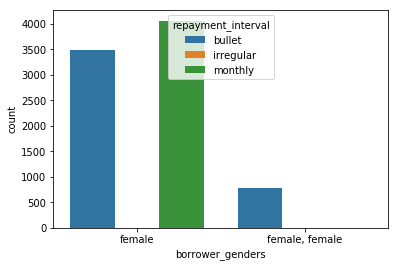

In [138]:
#Sex borrowers vs repayment interval
sns.countplot(x = 'borrower_genders',order = Ind['borrower_genders'].value_counts().iloc[:2].index,hue = 'repayment_interval', data = Ind)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

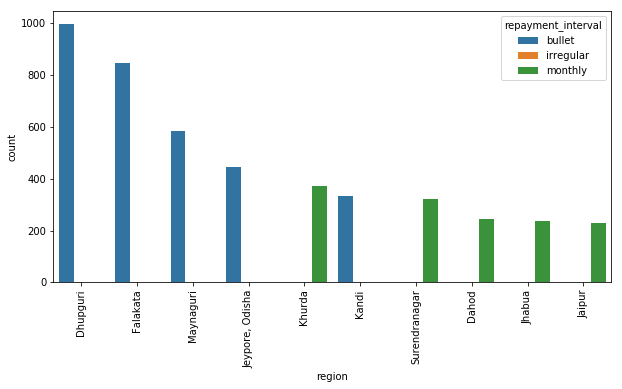

In [113]:
#Region vs repayment interval

plt.figure(figsize=(10,5))
sns.countplot(x = 'region',order = Ind['region'].value_counts().iloc[:10].index,hue = 'repayment_interval', data = Ind)
plt.xticks(rotation = 90)

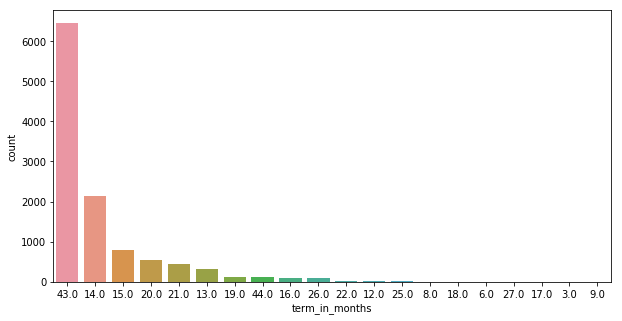

In [114]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'term_in_months',order = Ind['term_in_months'].value_counts().iloc[:20].index, data = Ind)

The highest Duration for which the loan was disbursed in months is __43__ followed by __14__

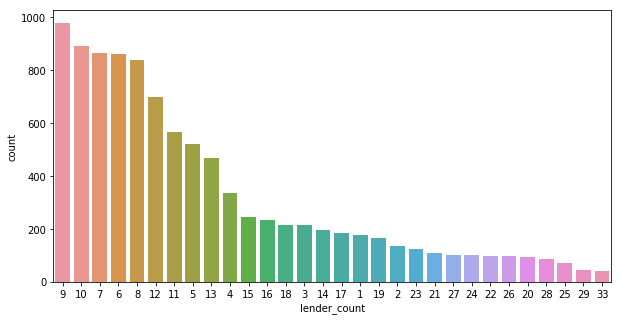

In [115]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'lender_count',order = Ind['lender_count'].value_counts().iloc[:30].index, data = Ind)

Most number of people who lends is __Nine__ followed by __Ten__ and __Seven__

In [117]:
theme_reg_ind = theme_reg[theme_reg['country'] == 'India']
theme_reg_ind.index = range(0, len(theme_reg_ind))

In [163]:
theme_reg_ind.head(3)

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,Agra,NaN,IND,...,2100,"Agra, India","[(27.1766701, 78.00807449999999)]",Agra; Agra; Uttar Pradesh; India,"(27.1766701, 78.00807449999999)",27.176670,78.008075,IND,NaN,0.0
1,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,Haryana,NaN,IND,...,1200,"Haryana, India","[(29.0587757, 76.085601)]",Haryana; India,"(29.0587757, 76.085601)",29.058776,76.085601,IND,NaN,0.0
2,225,Novica,Artisan,a1050000000T14Q,Artisan,India,No,Jaipur,NaN,IND,...,4000,"Jaipur, India","[(26.9124336, 75.7872709)]",Jaipur; Jaipur; Rajasthan; India,"(26.9124336, 75.7872709)",26.912434,75.787271,IND,NaN,0.0


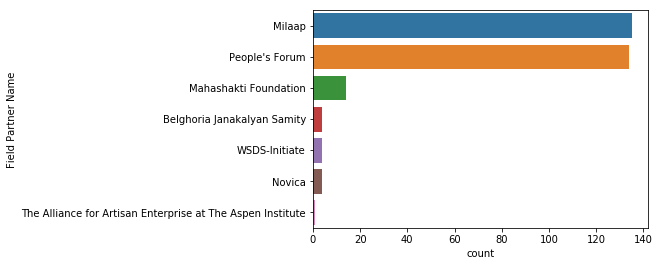

In [119]:
# Funding partners
sns.countplot(y = 'Field Partner Name', order = theme_reg_ind['Field Partner Name'].value_counts().iloc[:10].index, data = theme_reg_ind)

Most dominant field partner in India is __Milaap__ followed by __People's Forum.__

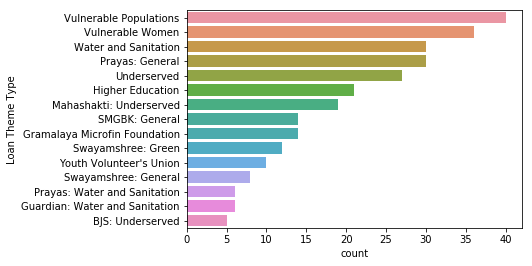

In [120]:
#Loan theme type
sns.countplot(y = 'Loan Theme Type', order = theme_reg_ind['Loan Theme Type'].value_counts().iloc[:15].index, data = theme_reg_ind)

__Popular Loan Theme type__:
    
    1. Vulnerable populations
    2. Vulnerable Women
    3. Water and Sanitation 